In [52]:
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [53]:
!kaggle datasets download -d gurbanovafatima/admission-prediction

admission-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [54]:
#for unzipping aptos dataset

import zipfile
zip_ref = zipfile.ZipFile('/content/admission-prediction.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [55]:
import numpy as np
import pandas as pd

In [56]:
df=pd.read_csv('Admission_Predict.csv')

In [57]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [58]:
df.shape

(400, 9)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [60]:
#will remove serial number
#we will use min max scaling to get values in proper range

In [61]:
df.drop(columns=['Serial No.'],inplace=True)

In [62]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [63]:
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [64]:
X,y

(     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
 0          337          118                  4  4.5   4.5  9.65         1
 1          324          107                  4  4.0   4.5  8.87         1
 2          316          104                  3  3.0   3.5  8.00         1
 3          322          110                  3  3.5   2.5  8.67         1
 4          314          103                  2  2.0   3.0  8.21         0
 ..         ...          ...                ...  ...   ...   ...       ...
 395        324          110                  3  3.5   3.5  9.04         1
 396        325          107                  3  3.0   3.5  9.11         1
 397        330          116                  4  5.0   4.5  9.45         1
 398        312          103                  3  3.5   4.0  8.78         0
 399        333          117                  4  5.0   4.0  9.66         1
 
 [400 rows x 7 columns],
 0      0.92
 1      0.76
 2      0.72
 3      0.80
 4      0.65
        

In [65]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [66]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
#we get now values in numpy array

In [67]:
X_train,X_test

(     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
 93         301           97                  2  3.0   3.0  7.88         1
 23         334          119                  5  5.0   4.5  9.70         1
 299        305          112                  3  3.0   3.5  8.65         0
 13         307          109                  3  4.0   3.0  8.00         1
 90         318          106                  2  4.0   4.0  7.92         1
 ..         ...          ...                ...  ...   ...   ...       ...
 255        307          110                  4  4.0   4.5  8.37         0
 72         321          111                  5  5.0   5.0  9.45         1
 396        325          107                  3  3.0   3.5  9.11         1
 235        326          111                  5  4.5   4.0  9.23         1
 37         300          105                  1  1.0   2.0  7.80         0
 
 [320 rows x 7 columns],
      GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Researc

In [68]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [69]:
model=Sequential()
model.add(Dense(10,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

In [70]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                80        
                                                                 
 dense_10 (Dense)            (None, 7)                 77        
                                                                 
 dense_11 (Dense)            (None, 1)                 8         
                                                                 
Total params: 165 (660.00 Byte)
Trainable params: 165 (660.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [71]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [72]:
history=model.fit(X_train_scaled,y_train,epochs=100, validation_split=0.2)

Epoch 1/100
8/8 [==============================] - 1s 22ms/step - loss: 0.3663 - val_loss: 0.3386
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 0.2810 - val_loss: 0.2442
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 0.2005 - val_loss: 0.1630
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 0.1293 - val_loss: 0.0984
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0769 - val_loss: 0.0551
Epoch 6/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0438 - val_loss: 0.0320
Epoch 7/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0273 - val_loss: 0.0229
Epoch 8/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0206 - val_loss: 0.0209
Epoch 9/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0188 - val_loss: 0.0208
Epoch 10/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0181 - val_loss: 0.0203
Epoch 11/100
8/8 [==========

In [73]:
y_pred=model.predict(X_test_scaled)

3/3 [==============================] - 0s 4ms/step


In [74]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7784622634569522

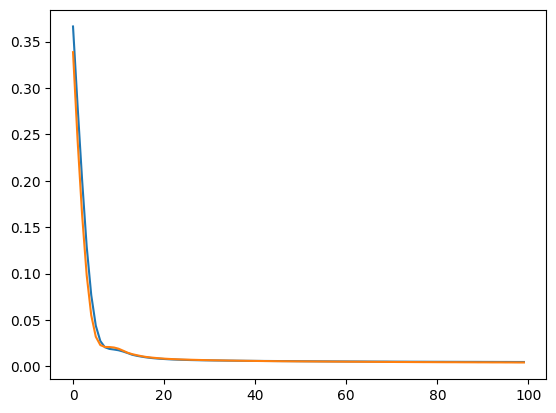

In [75]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])